In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [ ]:
trainData.columns

In [ ]:
features_to_use = list(trainData.columns)
features_to_use.remove('yield')
features_to_use.remove('id')
features_to_use.remove('Row#')
features_to_use

In [5]:
def select_best_features_using_importance(X, y, n_estimators=900, max_depth=6, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train_scaled, y_train)

    # Get feature importance
    feature_importances = rf_model.feature_importances_

    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("Features sorted by importance:")
    print(feature_importance_df)

    # Select top features (you can decide how many to select)
    selected_features = feature_importance_df['Feature'].head(5)  # Selecting top 5 features
    return selected_features

## ***ModelName: GradientBoostingRegressor***

#### ***Validations:  > *Train-Test Split Validation****


#### ***Validations:  > *Leave-One-Out Cross-Validation (LOOCV)****


#### ***Validations:  > *K-Fold Cross-Validation****


#### ***Validations:  > *Stratified K-Fold Cross-Validation****


#### ***Validations:  > *Time Series Split Cross-Validation****


#### ***Validations:  > *Hold-Out Validation****


#### ***Validations:  > *Bootstrapping****


#### ***Validations:  > *Nested Cross-Validation****


## ***ModelName: GradientBoostingRegressor***

#### ***Validations:  > *Train-Test Split Validation****


#### ***Validations:  > *Leave-One-Out Cross-Validation (LOOCV)****


#### ***Validations:  > *K-Fold Cross-Validation****


#### ***Validations:  > *Stratified K-Fold Cross-Validation****


#### ***Validations:  > *Time Series Split Cross-Validation****


#### ***Validations:  > *Hold-Out Validation****


#### ***Validations:  > *Bootstrapping****


#### ***Validations:  > *Nested Cross-Validation****


## ***ModelName: GradientBoostingRegressor***

#### ***Validations:  > *Train-Test Split Validation****


#### ***Validations:  > *Leave-One-Out Cross-Validation (LOOCV)****


#### ***Validations:  > *K-Fold Cross-Validation****


#### ***Validations:  > *Stratified K-Fold Cross-Validation****


#### ***Validations:  > *Time Series Split Cross-Validation****


#### ***Validations:  > *Hold-Out Validation****


#### ***Validations:  > *Bootstrapping****


#### ***Validations:  > *Nested Cross-Validation****


## ***ModelName: GradientBoostingRegressor***

#### ***Validations:  > *Train-Test Split Validation****


In [6]:
# Train-Test Split Validation
def train_model_with_train_test_split(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]

    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=120, learning_rate=0.05, max_depth=5, random_state=42)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f"\nMean Absolute Error (Train-Test Split): {mae:.4f}")

    # Predict on testData
    if testData is not None:
        X_test_final_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_final_scaled)

        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })

        output_file = 'YieldPrediction_TrainTest.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

#### ***Validations:  > *Leave-One-Out Cross-Validation (LOOCV)****


In [7]:
# Validation using Leave-One-Out Cross-Validation (LOOCV)
def train_model_with_loocv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.07, max_depth=4, random_state=42)

    # Perform LOOCV
    loo = LeaveOneOut()
    cv_scores = cross_val_score(model, X_scaled, y, cv=loo, scoring='neg_mean_absolute_error')

    # Average MAE
    print(f"\nMean Absolute Error (LOOCV): {np.mean(-cv_scores):.4f}")

    # Fit the model on the entire dataset
    model.fit(X_scaled, y)

    # Predict on testData
    if testData is not None:
        X_test_final_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_final_scaled)

        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })

        output_file = 'YieldPrediction_LOOCV.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

#### ***Validations:  > *K-Fold Cross-Validation****


In [8]:
# Validation using K-Fold Cross-Validation
def train_model_with_kfold_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=120, learning_rate=0.05, max_depth=5, random_state=75)

    # Perform K-Fold Cross-Validation (5-Fold)
    cv_scores = cross_val_score(model, X_scaled, y, cv=20, scoring='neg_mean_absolute_error')

    # Calculate average MAE across folds
    print(f"\nCross-validated MAE (5-Fold): {np.mean(-cv_scores):.4f}")

    # Fit the model on the entire dataset
    model.fit(X_scaled, y)

    # Predict on testData
    if testData is not None:
        X_test_final_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_final_scaled)

        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })

        output_file = 'YieldPrediction_KFold.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

#### ***Validations:  > *Stratified K-Fold Cross-Validation****


In [9]:
# Validation using Stratified K-Fold Cross-Validation
def train_model_with_stratified_kfold_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.07, max_depth=4, random_state=42)

    # Stratified K-Fold (5-Fold)
    skf = StratifiedKFold(n_splits=5)
    cv_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='neg_mean_absolute_error')

    # Average MAE
    print(f"\nCross-validated MAE (Stratified K-Fold): {np.mean(-cv_scores):.4f}")

    # Fit the model on the entire dataset
    model.fit(X_scaled, y)

    # Predict on testData
    if testData is not None:
        X_test_final_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_final_scaled)

        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })

        output_file = 'YieldPrediction_StratifiedKFold.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

#### ***Validations:  > *Time Series Split Cross-Validation****


In [10]:
# Validation using Time Series Cross-Validation
from sklearn.model_selection import TimeSeriesSplit


def train_model_with_timeseries_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42)

    # Time Series Cross-Validation (5 splits)
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(model, X_scaled, y, cv=tscv, scoring='neg_mean_absolute_error')

    # Average MAE
    print(f"\nCross-validated MAE (Time Series CV): {np.mean(-cv_scores):.4f}")

    # Fit the model on the entire dataset
    model.fit(X_scaled, y)

    # Predict on testData
    if testData is not None:
        X_test_final_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_final_scaled)

        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })

        output_file = 'YieldPrediction_TimeSeriesCV.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

#### ***Validations:  > *Hold-Out Validation****


#### ***Validations:  > *Bootstrapping****


#### ***Validations:  > *Nested Cross-Validation****


In [11]:
# Validation using Nested Cross-Validation
def train_model_with_nested_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(random_state=42)

    # Parameter grid for hyperparameter tuning
    param_grid = {'n_estimators': [120, 150], 'learning_rate': [0.03, 0.05], 'max_depth': [4, 5]}
    grid = GridSearchCV(model, param_grid, cv=3)

    # Nested Cross-Validation
    cv_scores = cross_val_score(grid, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')

    # Average MAE
    print(f"\nCross-validated MAE (Nested CV): {np.mean(-cv_scores):.4f}")

    # Fit the best model on the entire dataset
    grid.fit(X_scaled, y)

    # Predict on testData
    if testData is not None:
        X_test_final_scaled = scaler.transform(testData[selected_features])
        testPredictions = grid.predict(X_test_final_scaled)

        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })

        output_file = 'YieldPrediction_NestedCV.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# ***Checking Error wrt Other***

In [ ]:
# Example usage
X = trainData[features_to_use]  # All features initially
y = trainData['yield']

selected_features = select_best_features_using_importance(X, y)

# Call your preferred validation function
train_model_with_train_test_split(X, y, selected_features, testData=testData, idTest=testData['id'])
# Or use any of the other validation methods
train_model_with_kfold_cv(X, y, selected_features, testData=testData, idTest=testData['id'])
train_model_with_timeseries_cv(X, y, selected_features, testData=testData, idTest=testData['id'])
train_model_with_nested_cv(X, y, selected_features, testData=testData, idTest=testData['id'])

In [ ]:
yieldBest = pd.read_csv('BestPrediction.csv')
yieldPredict = pd.read_csv('YieldPrediction_KFold.csv')
mae = mean_absolute_error(yieldBest['yield'], yieldPredict['PredictedYield'])
mae

In [ ]:
yieldBest = pd.read_csv('YieldPrediction.csv')
mae = mean_absolute_error(yieldBest['yield'], yieldPredict['PredictedYield'])
mae

# dg

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [ ]:
features_to_use = list(trainData.columns)
features_to_use.remove('yield')
features_to_use.remove('id')
features_to_use.remove('Row#')
features_to_use

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Step 1: Select best features using Random Forest Feature Importance (this part remains the same)
def select_best_features_using_importance(X, y, n_estimators=200, max_depth=5, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train_scaled, y_train)
    
    # Get feature importance
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Features sorted by importance:")
    print(feature_importance_df)
    
    # Select top features (you can decide how many to select)
    selected_features = feature_importance_df['Feature'].head(5)  # Selecting top 5 features
    return selected_features

# Step 2: Train a model using selected features with Cross-Validation
def train_model_with_selected_features_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # Select model type
    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=120, learning_rate=0.09, max_depth=5, random_state=42)
    else:
        raise ValueError("Unsupported model type")

    # Perform 5-Fold Cross-Validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

    # Since the scoring returns negative MAE, we'll negate it to show positive values
    print(f"\nCross-validated MAE (5-Fold): {np.mean(-cv_scores):.4f}")
    
    # Fit the model on the entire dataset
    model.fit(X_scaled, y)
    
    # Predict on testData (optional)
    if testData is not None:
        X_test_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_scaled)
        
        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })
        
        output_file = 'BestPrediction.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# Example usage
X = trainData[features_to_use]  # All features initially
y = trainData['yield']

# Step 1: Select best features using feature importance
selected_features = select_best_features_using_importance(X, y)

# Step 2: Train a model with cross-validation using those selected features
train_model_with_selected_features_cv(X, y, selected_features, testData=testData, idTest=testData['id'])

In [ ]:
# Step 1: Select best features using Random Forest Feature Importance (this part remains the same)
def select_best_features_using_importance(X, y, n_estimators=900, max_depth=6, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train_scaled, y_train)
    
    # Get feature importance
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Features sorted by importance:")
    print(feature_importance_df)
    
    # Select top features (you can decide how many to select)
    selected_features = feature_importance_df['Feature'].head(5)  # Selecting top 5 features
    return selected_features

# Step 2: Train a model using selected features with Cross-Validation
def train_model_with_selected_features_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # Select model type
    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.07, max_depth=4, random_state=42)
    else:
        raise ValueError("Unsupported model type")

    # Perform 5-Fold Cross-Validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=40, scoring='neg_mean_absolute_error')

    # Since the scoring returns negative MAE, we'll negate it to show positive values
    print(f"\nCross-validated MAE (5-Fold): {np.mean(-cv_scores):.4f}")
    
    # Fit the model on the entire dataset
    model.fit(X_scaled, y)
    
    # Predict on testData (optional)
    if testData is not None:
        X_test_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_scaled)
        
        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })
        
        output_file = 'YieldPrediction_1.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# Example usage
X = trainData[features_to_use]  # All features initially
y = trainData['yield']

# Step 1: Select best features using feature importance
selected_features = select_best_features_using_importance(X, y)

# Step 2: Train a model with cross-validation using those selected features
train_model_with_selected_features_cv(X, y, selected_features, testData=testData, idTest=testData['id'])

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from xgboost import XGBRegressor
# from sklearn.ensemble import RandomForestRegressor

# def select_best_features_using_importance(X, y, n_estimators=300, max_depth=7, random_state=42):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Fit RandomForest to find feature importance
#     rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
#     rf_model.fit(X_train_scaled, y_train)
    
#     # Get feature importance
#     feature_importances = rf_model.feature_importances_
    
#     # Sort features by importance
#     feature_importance_df = pd.DataFrame({
#         'Feature': X.columns,
#         'Importance': feature_importances
#     }).sort_values(by='Importance', ascending=False)
    
#     print("Features sorted by importance:")
#     print(feature_importance_df)
    
#     # Select top features
#     selected_features = feature_importance_df['Feature'].head(5)  # Selecting top 5 features
#     return selected_features

# def train_model_with_selected_features_cv(X, y, selected_features, testData=None, idTest=None, model_type='xgboost'):
#     X_selected = X[selected_features]
    
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X_selected)

#     # Configure XGBoost model
#     if model_type == 'xgboost':
#         model = XGBRegressor(
#             n_estimators=120,
#             learning_rate=0.06,
#             max_depth=4,
#             random_state=42,
#             reg_alpha=0.2,  # L1 regularization
#             reg_lambda=1.0,  # L2 regularization
#             booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='mae',  # Moved eval_metric to model initialization
#             n_jobs=-1  # Use all available cores
#         )
#     else:
#         raise ValueError("Unsupported model type")

#     # Perform 50-Fold Cross-Validation
#     cv_scores = cross_val_score(model, X_scaled, y, cv=50, scoring='neg_mean_absolute_error')

#     # Print cross-validation results
#     print(f"\nCross-validated MAE (50-Fold): {np.mean(-cv_scores):.4f}")
#     print(f"Standard deviation of CV scores: {np.std(-cv_scores):.4f}")
    
#     # Fit the model on the entire dataset
#     model.fit(X_scaled, y)
    
#     # Feature importance for XGBoost model
#     feature_importance = pd.DataFrame({
#         'Feature': selected_features,
#         'Importance': model.feature_importances_
#     }).sort_values(by='Importance', ascending=False)
    
#     print("\nXGBoost Feature Importance:")
#     print(feature_importance)
    
#     # Predict on testData if provided
#     if testData is not None and idTest is not None:
#         X_test_scaled = scaler.transform(testData[selected_features])
#         testPredictions = model.predict(X_test_scaled)
        
#         output = pd.DataFrame({
#             'id': idTest,
#             'yield': testPredictions
#         })
        
#         output_file = 'YieldPrediction_XGBoost.csv'
#         output.to_csv(output_file, index=False)
#         print(f"\nPredictions saved to {output_file}")
    
#     return model

# def run_xgboost_pipeline(trainData, testData, features_to_use):
#     X = trainData[features_to_use]  # All features initially
#     y = trainData['yield']

#     # Step 1: Select best features using feature importance
#     selected_features = select_best_features_using_importance(X, y)

#     # Step 2: Train XGBoost model with cross-validation using selected features
#     model = train_model_with_selected_features_cv(
#         X, 
#         y, 
#         selected_features, 
#         testData=testData, 
#         idTest=testData['id']
#     )
    
#     return model, selected_features

# # To use the code:
# model, selected_features = run_xgboost_pipeline(trainData, testData, features_to_use)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import RandomForestRegressor
# import warnings
# warnings.filterwarnings('ignore')

# def select_best_features_using_importance(X, y, n_estimators=300, max_depth=7, random_state=42):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
#     rf_model.fit(X_train_scaled, y_train)
    
#     feature_importances = rf_model.feature_importances_
    
#     feature_importance_df = pd.DataFrame({
#         'Feature': X.columns,
#         'Importance': feature_importances
#     }).sort_values(by='Importance', ascending=False)
    
#     print("Features sorted by importance:")
#     print(feature_importance_df)
    
#     selected_features = feature_importance_df['Feature'].head(5)
#     return selected_features

# def get_model(model_type='xgboost'):
#     if model_type == 'xgboost':
#         return XGBRegressor(
#             n_estimators=150,
#             learning_rate=0.07,
#             max_depth=4,
#             random_state=42,
#             reg_alpha=0.1,
#             reg_lambda=1.0,
#             booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='mae',  # Moved to model initialization for XGBoost
#             n_jobs=-1
#         )
#     elif model_type == 'lightgbm':
#         return LGBMRegressor(
#             n_estimators=150,
#             learning_rate=0.07,
#             max_depth=4,
#             random_state=42,
#             reg_alpha=0.1,
#             reg_lambda=1.0,
#             boosting_type='gbdt',
#             objective='regression',
#             n_jobs=-1,
#             num_leaves=31,
#             feature_fraction=0.9,
#             bagging_fraction=0.8,
#             bagging_freq=5
#         )
#     else:
#         raise ValueError("Unsupported model type. Choose 'xgboost' or 'lightgbm'")

# def train_model_with_selected_features_cv(X, y, selected_features, testData=None, idTest=None, model_type='xgboost'):
#     X_selected = X[selected_features]
    
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X_selected)

#     model = get_model(model_type)

#     cv_scores = cross_val_score(model, X_scaled, y, cv=50, scoring='neg_mean_absolute_error')

#     print(f"\n{model_type.upper()} Cross-validated MAE (50-Fold): {np.mean(-cv_scores):.4f}")
#     print(f"Standard deviation of CV scores: {np.std(-cv_scores):.4f}")
    
#     # Different fitting approaches for XGBoost and LightGBM
#     if model_type == 'xgboost':
#         model.fit(X_scaled, y)  # Simplified XGBoost fit
#     else:  # LightGBM
#         model.fit(
#             X_scaled, 
#             y,
#             eval_metric='mae',
#             # verbose=False
#         )
    
#     feature_importance = pd.DataFrame({
#         'Feature': selected_features,
#         'Importance': model.feature_importances_
#     }).sort_values(by='Importance', ascending=False)
    
#     print(f"\n{model_type.upper()} Feature Importance:")
#     print(feature_importance)
    
#     if testData is not None and idTest is not None:
#         X_test_scaled = scaler.transform(testData[selected_features])
#         testPredictions = model.predict(X_test_scaled)
        
#         output = pd.DataFrame({
#             'id': idTest,
#             'yield': testPredictions
#         })
        
#         output_file = f'YieldPrediction_{model_type}.csv'
#         output.to_csv(output_file, index=False)
#         print(f"\nPredictions saved to {output_file}")
    
#     return model, feature_importance

# def run_boosting_pipeline(trainData, testData, features_to_use, models=['xgboost', 'lightgbm']):
#     X = trainData[features_to_use]
#     y = trainData['yield']

#     selected_features = select_best_features_using_importance(X, y)
    
#     results = {}
#     for model_type in models:
#         print(f"\n{'='*50}")
#         print(f"Training {model_type.upper()} model")
#         print('='*50)
        
#         model, importance = train_model_with_selected_features_cv(
#             X, 
#             y, 
#             selected_features, 
#             testData=testData, 
#             idTest=testData['id'],
#             model_type=model_type
#         )
        
#         results[model_type] = {
#             'model': model,
#             'feature_importance': importance
#         }
    
#     return results, selected_features

# def compare_predictions(results, testData, selected_features):
#     predictions = {}
#     scaler = StandardScaler()
#     X_test_scaled = scaler.fit_transform(testData[selected_features])
    
#     for model_type, model_data in results.items():
#         model = model_data['model']
#         predictions[model_type] = model.predict(X_test_scaled)
    
#     if len(predictions) > 1:
#         pred_df = pd.DataFrame(predictions)
#         correlation = pred_df.corr()
#         print("\nPrediction Correlation Matrix:")
#         print(correlation)
    
#     return predictions

# # Example usage:
# results, selected_features = run_boosting_pipeline(
#     trainData, 
#     testData, 
#     features_to_use,
#     models=['xgboost', 'lightgbm']
# )

# predictions = compare_predictions(results, testData, selected_features)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split, KFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# # Step 1: Select best features using Random Forest Feature Importance
# def select_best_features_using_importance(X, y, n_estimators=900, max_depth=6, random_state=42, top_n_features=5):
#     # Split data for training and testing
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    
#     # Scaling the data
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # RandomForest model to find feature importance
#     rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
#     rf_model.fit(X_train_scaled, y_train)
    
#     # Get feature importance
#     feature_importances = rf_model.feature_importances_
    
#     # Sort features by importance
#     feature_importance_df = pd.DataFrame({
#         'Feature': X.columns,
#         'Importance': feature_importances
#     }).sort_values(by='Importance', ascending=False)
    
#     print("Features sorted by importance:")
#     print(feature_importance_df)
    
#     # Select top features (you can change top_n_features for flexibility)
#     selected_features = feature_importance_df['Feature'].head(top_n_features)  
#     return selected_features

# # Step 2: Train a model using selected features with Cross-Validation and hyperparameter tuning
# def train_model_with_selected_features_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting', top_n_features=5):
#     # Selecting only the important features
#     X_selected = X[selected_features]
    
#     # Set up a pipeline for scaling and model fitting
#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('model', GradientBoostingRegressor(random_state=42))
#     ])
    
#     # Hyperparameter grid for GradientBoosting
#     param_grid_gb = {
#         'model__n_estimators': [100, 150, 200, 300],
#         'model__learning_rate': [0.01, 0.05, 0.1],
#         'model__max_depth': [3, 4, 5],
#         'model__subsample': [0.8, 1.0]
#     }
    
#     # Model selection and RandomizedSearchCV for hyperparameter tuning
#     if model_type == 'gradient_boosting':
#         model = RandomizedSearchCV(pipeline, param_grid_gb, n_iter=10, scoring='neg_mean_absolute_error', 
#                                    cv=KFold(n_splits=40, shuffle=True, random_state=42), 
#                                    verbose=1, random_state=42, n_jobs=-1)
#     else:
#         raise ValueError("Unsupported model type")

#     # Train the model using cross-validation
#     model.fit(X_selected, y)

#     # Display the best hyperparameters found during the search
#     print(f"Best Hyperparameters: {model.best_params_}")
    
#     # Calculate cross-validation MAE
#     cv_scores = cross_val_score(model, X_selected, y, cv=KFold(n_splits=40, shuffle=True, random_state=42), 
#                                 scoring='neg_mean_absolute_error')
#     print(f"\nCross-validated MAE (40-Fold): {np.mean(-cv_scores):.4f}")
    
#     # Predict on test data if provided
#     if testData is not None:
#         X_test_selected = testData[selected_features]
#         testPredictions = model.predict(X_test_selected)
        
#         # Save predictions to CSV file
#         output = pd.DataFrame({
#             'id': idTest,
#             'yield': testPredictions
#         })
        
#         output_file = 'YieldPrediction_Optimized.csv'
#         output.to_csv(output_file, index=False)
#         print(f"Predictions saved to {output_file}")

# # Example usage of the functions
# if __name__ == "__main__":
#     # Assuming trainData is a DataFrame that contains all your training features and 'yield' as the target
#     X = trainData[features_to_use]  # Replace 'features_to_use' with your feature list
#     y = trainData['yield']  # The target variable
    
#     # Step 1: Select best features using Random Forest feature importance
#     selected_features = select_best_features_using_importance(X, y, top_n_features=10)
    
#     # Step 2: Train a model with cross-validation using those selected features
#     train_model_with_selected_features_cv(X, y, selected_features, testData=testData, idTest=testData['id'], top_n_features=10)


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, cross_val_score
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.feature_selection import RFE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error

# # Step 1: Select best features using Random Forest Feature Importance
# def select_best_features_using_importance(X, y, n_estimators=900, max_depth=6, random_state=42):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
    
#     rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
#     rf_model.fit(X_train_scaled, y_train)
    
#     feature_importances = rf_model.feature_importances_
    
#     feature_importance_df = pd.DataFrame({
#         'Feature': X.columns,
#         'Importance': feature_importances
#     }).sort_values(by='Importance', ascending=False)
    
#     print("Features sorted by importance:")
#     print(feature_importance_df)
    
#     selected_features = feature_importance_df['Feature'].head(5)  # Selecting top 5 features
#     return selected_features

# # Step 2: Recursive Feature Elimination (RFE)
# def select_best_features_using_rfe(X, y, n_estimators=900, max_depth=6, random_state=42):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
    
#     rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
#     rfe = RFE(estimator=rf_model, n_features_to_select=5)
#     rfe.fit(X_train_scaled, y_train)
    
#     selected_features = X.columns[rfe.support_]
#     return selected_features

# # Step 3: Correlation-based Feature Selection
# def select_best_features_using_correlation(X, y, threshold=0.5):
#     corr_matrix = X.corrwith(y)
#     selected_features = corr_matrix[abs(corr_matrix) > threshold].index
#     return selected_features

# # Step 4: Train a model using selected features with K-Fold Cross-Validation
# def train_model_with_selected_features_cv_kfold(X, y, selected_features, k=5):
#     X_selected = X[selected_features]
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X_selected)
    
#     kf = KFold(n_splits=k, shuffle=True, random_state=42)
#     cv_scores = []
    
#     for train_index, val_index in kf.split(X_scaled):
#         X_train, X_val = X_scaled[train_index], X_scaled[val_index]
#         y_train, y_val = y[train_index], y[val_index]
        
#         model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.07, max_depth=4, random_state=42)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_val)
#         cv_scores.append(mean_absolute_error(y_val, y_pred))
    
#     print(f"Cross-validated MAE (K-Fold): {np.mean(cv_scores):.4f}")

# # Step 5: Train a model using Time Series Cross-Validation
# def train_model_with_selected_features_cv_tscv(X, y, selected_features):
#     X_selected = X[selected_features]
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X_selected)
    
#     tscv = TimeSeriesSplit(n_splits=5)
#     cv_scores = []
    
#     for train_index, val_index in tscv.split(X_scaled):
#         X_train, X_val = X_scaled[train_index], X_scaled[val_index]
#         y_train, y_val = y[train_index], y[val_index]
        
#         model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.07, max_depth=4, random_state=42)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_val)
#         cv_scores.append(mean_absolute_error(y_val, y_pred))
    
#     print(f"Cross- validated MAE (Time Series): {np.mean(cv_scores):.4f}")

# # Example usage
# X = trainData[features_to_use]  # All features initially
# y = trainData['yield']

# # Select best features using Random Forest Feature Importance
# selected_features_importance = select_best_features_using_importance(X, y)

# # Select best features using Recursive Feature Elimination (RFE)
# selected_features_rfe = select_best_features_using_rfe(X, y)

# # Select best features using Correlation-based Feature Selection
# selected_features_correlation = select_best_features_using_correlation(X, y)

# # Train a model using selected features with K-Fold Cross-Validation
# train_model_with_selected_features_cv_kfold(X, y, selected_features_importance)

# # Train a model using selected features with Time Series Cross-Validation
# train_model_with_selected_features_cv_tscv(X, y, selected_features_importance)

In [ ]:
yieldBest = pd.read_csv('BestPrediction.csv')
yieldPredict = pd.read_csv('YieldPrediction_Optimized.csv')
mae = mean_absolute_error(yieldBest['yield'], yieldPredict['yield'])
mae

In [ ]:
yieldBest = pd.read_csv('YieldPrediction.csv')
yieldPredict = pd.read_csv('YieldPrediction_Optimized.csv')
mae = mean_absolute_error(yieldBest['yield'], yieldPredict['yield'])
mae

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load your data
# df = pd.read_csv("train.csv")

# # Select relevant features for the pair plot
# features = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 
#             'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 
#             'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 
#             'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 
#             'seeds', 'yield']

# # Create a pair plot
# sns.pairplot(df[features])
# plt.suptitle('Pair Plot of Features', y=1.02)  # Adjust title position
# plt.show()

In [2]:
# Import Dependency
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (
    GradientBoostingRegressor, 
    AdaBoostRegressor, 
    BaggingRegressor, 
    VotingRegressor, 
    StackingRegressor, 
    RandomForestRegressor, 
    ExtraTreesRegressor
)
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Initialize the path
trainFile = 'train.csv'
testFile = 'test.csv'

# load datasets by read_csv
loadTrain = pd.read_csv(trainFile)
loadTest = pd.read_csv(testFile)

In [4]:
highCorr = ['seeds', 'fruitmass', 'fruitset']
modCorr = ['RainingDays', 'AverageRainingDays', 'clonesize', 'honeybee', 'Row#', 'bumbles']
lowCorr = ['andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']

In [8]:
# Evaluation metrics for cross-validation
def evalModelCV(model, x, y, cv=5):
    scoring = {
        'mse': make_scorer(mean_squared_error),
        'mae': make_scorer(mean_absolute_error),
        'r2': make_scorer(r2_score)
    }
    scores = cross_validate(model, x, y, cv=cv, scoring=scoring, return_train_score=False)
    mse = np.mean(scores['test_mse'])
    mae = np.mean(scores['test_mae'])
    r2 = np.mean(scores['test_r2'])
    return mse, mae, r2

# Save test predictions after model fitting
def testModel(model, modelName, xTestScaled, idTest):
    predictions = model.predict(xTestScaled)
    saveFile(predictions, idTest, modelName=modelName)

# Main model training function
def saveFile(yieldList, idList, modelName):
    # Ensure the lengths match before saving
    if len(yieldList) != len(idList):
        raise ValueError(f"Prediction length {len(yieldList)} does not match ID length {len(idList)}")
    
    predictYield = pd.DataFrame({
        'id': idList,
        'yield': yieldList
    })
    predictYield.to_csv(f'outputModel/YieldPredict_{modelName}_.csv', index=False)

def trainModel(x, y, testData=None, idTest=None, testSize=.2, randomState=42, lRate=0.1, cv=5):
    # Split the dataset
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=testSize, random_state=randomState, shuffle=True)

    # Scale the data
    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xTestScaled = scaler.transform(xTest)

    # Ensure testData and idTest lengths match
    if len(testData) != len(idTest):
        raise ValueError(f"Test data length {len(testData)} does not match ID length {len(idTest)}")

    testDataScaled = scaler.transform(testData)  # Scale the testData correctly

    # Define models
    models = {
        'GradientBoosting': GradientBoostingRegressor(n_estimators=120, learning_rate=lRate, max_depth=4, random_state=randomState),
        'XGBoost': XGBRegressor(n_estimators=120, learning_rate=lRate, max_depth=4, random_state=randomState, eval_metric='mae'),
        'XGBRF': XGBRFRegressor(n_estimators=120, learning_rate=lRate, max_depth=4, random_state=randomState),
        'AdaBoost': AdaBoostRegressor(n_estimators=120, learning_rate=lRate, random_state=randomState),
        'Bagging': BaggingRegressor(n_estimators=120, random_state=randomState),
        'RandomForest': RandomForestRegressor(n_estimators=120, random_state=randomState),
        'ExtraTrees': ExtraTreesRegressor(n_estimators=120, random_state=randomState),
        'Voting': VotingRegressor([('rf', RandomForestRegressor(n_estimators=120, random_state=randomState)),
                                   ('et', ExtraTreesRegressor(n_estimators=120, random_state=randomState))]),
        'Stacking': StackingRegressor(
            estimators=[('dt', DecisionTreeRegressor(max_depth=4)), ('ridge', Ridge())],
            final_estimator=RandomForestRegressor(n_estimators=120, random_state=randomState)
        )
    }

    # Train and evaluate each model
    for modelName, model in models.items():
        print(f"\nTraining {modelName} model with {cv}-fold cross-validation...")

        # Cross-validated metrics
        mse, mae, r2 = evalModelCV(model, xTrainScaled, yTrain, cv=cv)
        print(f"{modelName} cross-validated performance:")
        print(f"  Mean Squared Error (MSE): {mse:.4f}")
        print(f"  Mean Absolute Error (MAE): {mae:.4f}")
        print(f"  R² Score: {r2:.4f}")

        # Fit the model on the full training set
        model.fit(xTrainScaled, yTrain)

        # Test the model on the actual test data (testDataScaled) and save results
        testModel(model, modelName, testDataScaled, idTest)


# Example usage with your data
x = loadTrain[modCorr + highCorr]  # Feature columns
y = loadTrain['yield']             # Target variable (yield)

trainModel(x, y, loadTest[modCorr + highCorr], loadTest['id'], testSize=.2, randomState=42, lRate=0.01, cv=10)



Training GradientBoosting model with 10-fold cross-validation...
GradientBoosting cross-validated performance:
  Mean Squared Error (MSE): 301706.6778
  Mean Absolute Error (MAE): 420.4448
  R² Score: 0.8337

Training XGBoost model with 10-fold cross-validation...
XGBoost cross-validated performance:
  Mean Squared Error (MSE): 303542.2520
  Mean Absolute Error (MAE): 421.3612
  R² Score: 0.8327

Training XGBRF model with 10-fold cross-validation...
XGBRF cross-validated performance:
  Mean Squared Error (MSE): 1784140.3937
  Mean Absolute Error (MAE): 1085.4978
  R² Score: 0.0164

Training AdaBoost model with 10-fold cross-validation...
AdaBoost cross-validated performance:
  Mean Squared Error (MSE): 183610.4330
  Mean Absolute Error (MAE): 297.8184
  R² Score: 0.8989

Training Bagging model with 10-fold cross-validation...
Bagging cross-validated performance:
  Mean Squared Error (MSE): 157456.5077
  Mean Absolute Error (MAE): 262.8483
  R² Score: 0.9133

Training RandomForest mode


Feature Selection and Engineering Summary:
----------------------------------------
Total features after engineering: 13

Features included:
- RainingDays
- AverageRainingDays
- fruitset
- fruitmass
- seeds
- RainingDays_squared
- AverageRainingDays_squared
- fruitset_squared
- fruitmass_squared
- seeds_squared
- PCA_1
- PCA_2
- PCA_3


<Figure size 2000x2000 with 0 Axes>

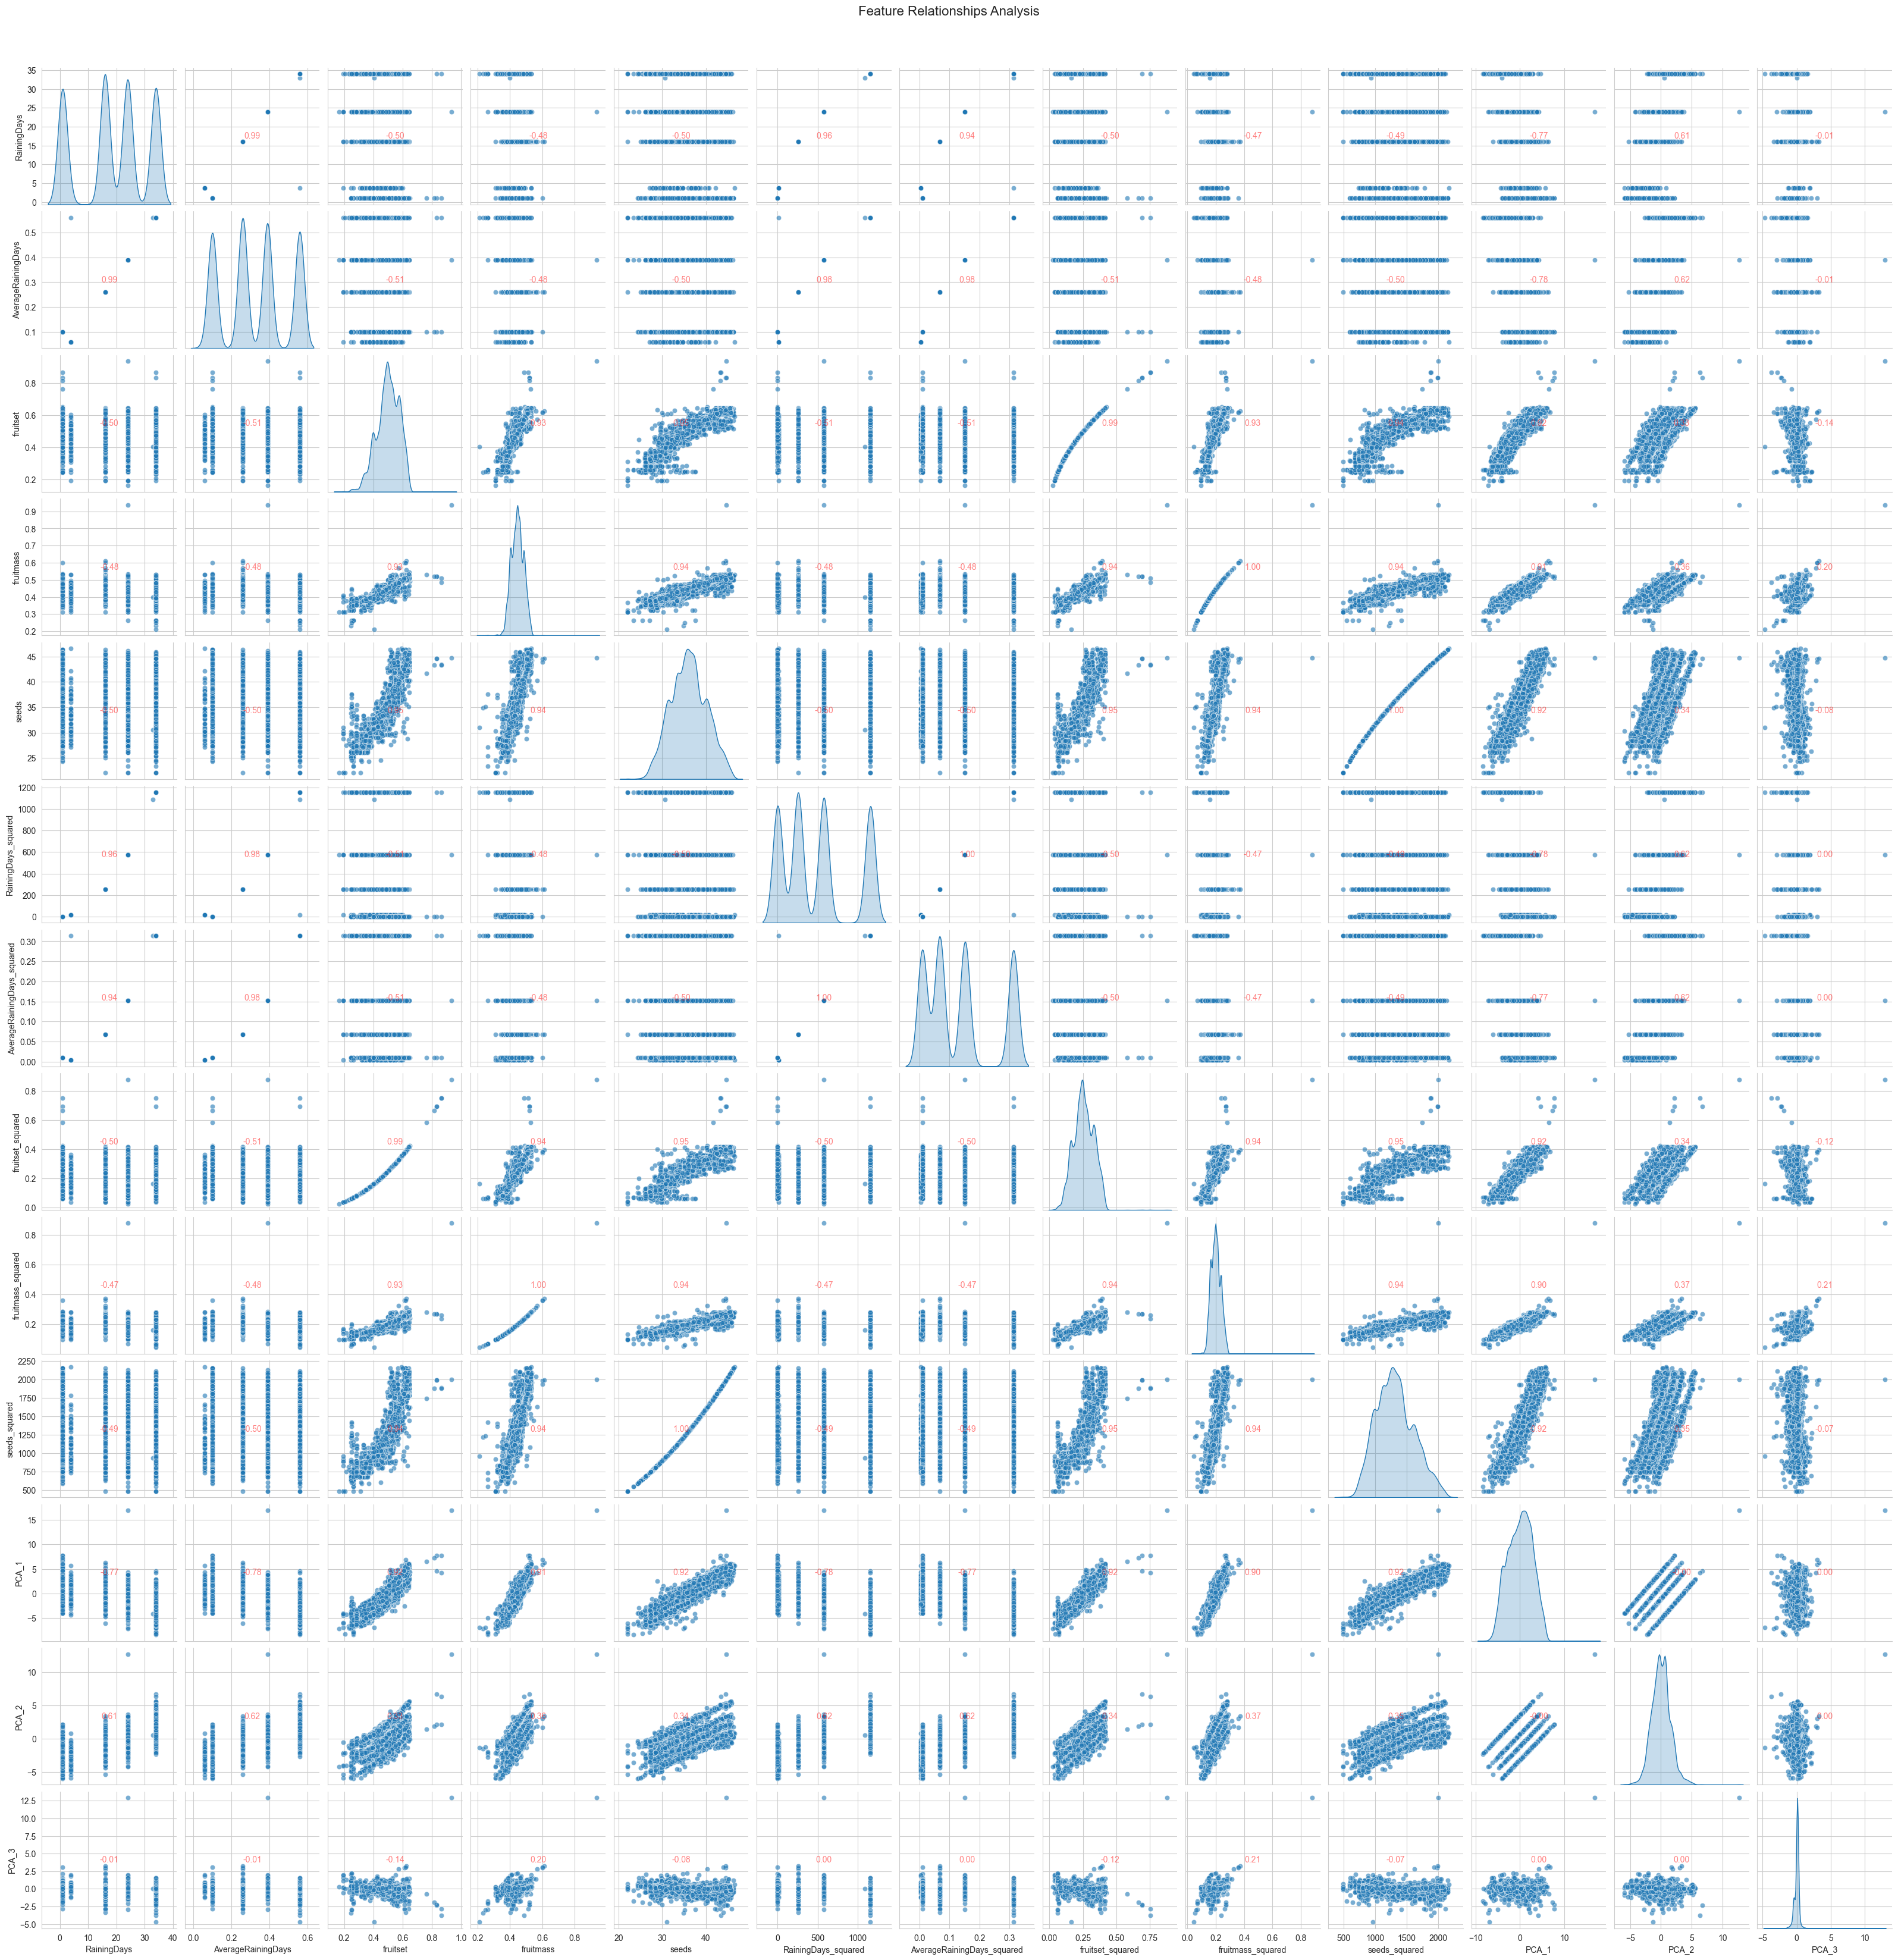

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

def create_feature_analysis(data_path, target_column=None, n_features=10):
    """
    Create feature analysis with selection and combinations
    
    Parameters:
    -----------
    data_path : str
        Path to the dataset CSV file
    target_column : str
        Name of the target column (if classification task)
    n_features : int
        Number of top features to select
    """
    # Load and prepare data
    try:
        df = pd.read_csv(data_path)
    except:
        # Create sample data if no file provided
        np.random.seed(42)
        n_samples = 1000
        df = pd.DataFrame({
            'feature1': np.random.normal(0, 1, n_samples),
            'feature2': np.random.normal(2, 1.5, n_samples),
            'feature3': np.random.normal(-1, 2, n_samples),
            'feature4': np.random.normal(3, 0.5, n_samples),
            'target': np.random.randint(0, 2, n_samples)
        })
    
    # Separate features and target
    if target_column and target_column in df.columns:
        X = df.drop(columns=[target_column])
        y = df[target_column]
    else:
        X = df
        y = None

    # Remove non-numeric columns
    X = X.select_dtypes(include=[np.number])
    
    # Feature engineering
    # 1. Create polynomial features for numeric columns
    for col in X.columns:
        X[f'{col}_squared'] = X[col] ** 2
    
    # 2. Create interaction terms between selected features
    numeric_cols = X.columns[:min(5, len(X.columns))]  # Limit to first 5 features
    for i, col1 in enumerate(numeric_cols):
        for col2 in numeric_cols[i+1:]:
            X[f'{col1}_{col2}_interaction'] = X[col1] * X[col2]
    
    # Feature selection
    if y is not None:
        # Select top features using ANOVA F-value
        selector = SelectKBest(score_func=f_classif, k=n_features)
        X_selected = selector.fit_transform(X, y)
        selected_features = X.columns[selector.get_support()].tolist()
        X = X[selected_features]
    
    # Feature combination using PCA
    pca = PCA(n_components=min(3, X.shape[1]))
    pca_features = pca.fit_transform(StandardScaler().fit_transform(X))
    
    # Add PCA components back to dataframe
    for i in range(pca_features.shape[1]):
        X[f'PCA_{i+1}'] = pca_features[:, i]
    
    # Create visualization
    plt.figure(figsize=(20, 20))
    sns.set_style("whitegrid")
    
    # Create pairplot
    pairs = sns.pairplot(X, diag_kind='kde', plot_kws={'alpha': 0.6})
    pairs.fig.suptitle('Feature Relationships Analysis', y=1.02, size=16)
    
    # Add correlation values
    for i in range(len(X.columns)):
        for j in range(len(X.columns)):
            if i != j:
                corr = X.iloc[:, i].corr(X.iloc[:, j])
                pairs.axes[i, j].annotate(f'{corr:.2f}', 
                                        xy=(0.5, 0.5), 
                                        xycoords='axes fraction',
                                        ha='center', 
                                        va='center',
                                        color='red',
                                        alpha=0.5)
    
    return X, pairs

def main():
    # Example usage
    X, visualization = create_feature_analysis(
        data_path='train.csv',  # Replace with your data path
        target_column='yield',
        n_features=10
    )
    
    # Print feature information
    print("\nFeature Selection and Engineering Summary:")
    print("----------------------------------------")
    print(f"Total features after engineering: {len(X.columns)}")
    print("\nFeatures included:")
    for col in X.columns:
        print(f"- {col}")
    
    plt.show()

if __name__ == "__main__":
    main()

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

class MLPipeline:
    def __init__(self, n_features=10):
        self.n_features = n_features
        self.scaler = StandardScaler()
        self.feature_selector = SelectKBest(score_func=f_classif, k=n_features)
        self.pca = PCA(n_components=5)
        self.selected_features = None
        self.best_model = None
        self.feature_importance = None
        
    def prepare_features(self, X):
        """Feature engineering and preprocessing"""
        # Create polynomial features
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        X_processed = X.copy()
        
        for col in numeric_cols:
            X_processed[f'{col}_squared'] = X_processed[col] ** 2

        # Create interaction terms
        for i, col1 in enumerate(numeric_cols[:min(5, len(numeric_cols))]):
            for col2 in numeric_cols[i+1:min(i+6, len(numeric_cols))]:
                X_processed[f'{col1}_{col2}_interaction'] = X_processed[col1] * X_processed[col2]
        
        return X_processed

    def select_features(self, X, y=None, is_training=True):
        """Feature selection and scaling"""
        # Handle non-numeric columns
        X_numeric = X.select_dtypes(include=[np.number])
        
        if is_training:
            # Scale features
            X_scaled = self.scaler.fit_transform(X_numeric)
            
            if y is not None:
                # Select best features
                X_selected = self.feature_selector.fit_transform(X_scaled, y)
                self.selected_features = X_numeric.columns[self.feature_selector.get_support()].tolist()
            else:
                X_selected = X_scaled
                self.selected_features = X_numeric.columns.tolist()
            
            # Apply PCA
            X_pca = self.pca.fit_transform(X_selected)
            
        else:
            # Use pre-fitted transformations
            X_scaled = self.scaler.transform(X_numeric)
            X_selected = self.feature_selector.transform(X_scaled)
            X_pca = self.pca.transform(X_selected)
        
        # Combine selected features and PCA components
        X_final = np.hstack([X_selected, X_pca])
        
        return X_final

    def train_models(self, X_train, y_train):
        """Train and compare multiple models"""
        models = {
            'RandomForest': {
                'model': RandomForestRegressor(),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 20, None],
                    'min_samples_split': [2, 5]
                }
            },
            'GradientBoosting': {
                'model': GradientBoostingRegressor(),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 5],
                    'learning_rate': [0.01, 0.1]
                }
            },
            'LinearRegression': {
                'model': LinearRegression(),
                'params': {}
            },
            'SVR': {
                'model': SVR(),
                'params': {
                    'C': [0.1, 1.0, 10.0],
                    'kernel': ['rbf', 'linear']
                }
            }
        }

        best_score = float('-inf')
        best_model_name = None
        results = {}

        # Split training data for validation
        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )

        for name, model_info in models.items():
            print(f"\nTraining {name}...")
            if model_info['params']:
                grid_search = GridSearchCV(
                    model_info['model'],
                    model_info['params'],
                    cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1
                )
                grid_search.fit(X_train_split, y_train_split)
                best_model = grid_search.best_estimator_
                val_score = -grid_search.score(X_val_split, y_val_split)  # Negative MSE
                best_params = grid_search.best_params_
            else:
                best_model = model_info['model']
                best_model.fit(X_train_split, y_train_split)
                val_score = -np.mean((best_model.predict(X_val_split) - y_val_split) ** 2)
                best_params = {}

            results[name] = {
                'val_score': val_score,
                'best_params': best_params
            }
            
            if val_score > best_score:
                best_score = val_score
                best_model_name = name
                self.best_model = best_model

        print("\nModel Comparison:")
        for name, result in results.items():
            print(f"{name}:")
            print(f"Validation RMSE: {np.sqrt(-result['val_score']):.4f}")
            if result['best_params']:
                print(f"Best Parameters: {result['best_params']}")

        print(f"\nBest Model: {best_model_name} with RMSE {np.sqrt(-best_score):.4f}")
        
        # Retrain best model on full training data
        if best_model_name in ['RandomForest', 'GradientBoosting']:
            self.best_model.fit(X_train, y_train)
            self.feature_importance = self.best_model.feature_importances_

    def predict(self, X_test):
        """Generate predictions for test data"""
        return self.best_model.predict(X_test)

    def plot_feature_importance(self):
        """Plot feature importance if available"""
        if self.feature_importance is not None:
            plt.figure(figsize=(10, 6))
            feature_names = [f'Feature_{i}' for i in range(len(self.feature_importance))]
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': self.feature_importance
            }).sort_values('importance', ascending=False)
            
            sns.barplot(data=importance_df, x='importance', y='feature')
            plt.title('Feature Importance')
            plt.show()

def main():
    # Load data
    try:
        train_df = pd.read_csv('train.csv')
        test_df = pd.read_csv('test.csv')
        print("Data loaded successfully")
        print(f"Training set shape: {train_df.shape}")
        print(f"Test set shape: {test_df.shape}")
    except Exception as e:
        print(f"Error loading data: {e}")
        return

    # Separate features and target in training data
    X_train = train_df.drop('yield', axis=1)  # Assuming 'yield' is the target column
    y_train = train_df['yield']
    X_test = test_df  # Test data doesn't have target

    # Initialize and run pipeline
    pipeline = MLPipeline(n_features=10)
    
    # Prepare features
    print("\nPreparing features...")
    X_train = pipeline.prepare_features(X_train)
    X_test = pipeline.prepare_features(X_test)
    
    # Select features
    print("Selecting features...")
    X_train_selected = pipeline.select_features(X_train, y_train, is_training=True)
    X_test_selected = pipeline.select_features(X_test, is_training=False)
    
    # Train models
    print("Training models...")
    pipeline.train_models(X_train_selected, y_train)
    
    # Generate predictions for test set
    print("\nGenerating predictions for test set...")
    predictions = pipeline.predict(X_test_selected)
    
    # Create submission file
    submission_df = pd.DataFrame({
        'id': test_df.index,  # Assuming index can be used as ID
        'yield': predictions
    })
    
    # Save predictions
    submission_file = 'predictions.csv'
    submission_df.to_csv(submission_file, index=False)
    print(f"\nPredictions saved to {submission_file}")
    
    # Plot feature importance
    print("\nPlotting feature importance...")
    pipeline.plot_feature_importance()
    
    # Display sample predictions
    print("\nSample predictions:")
    print(submission_df.head())
    
    # Display basic statistics of predictions
    print("\nPrediction statistics:")
    print(submission_df['yield'].describe())

if __name__ == "__main__":
    main()

Data loaded successfully
Training set shape: (15000, 19)
Test set shape: (10000, 18)

Preparing features...
Selecting features...
Training models...

Training RandomForest...

Training GradientBoosting...

Training LinearRegression...

Training SVR...

Model Comparison:
RandomForest:
Validation RMSE: nan
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
GradientBoosting:
Validation RMSE: nan
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
LinearRegression:
Validation RMSE: 441.5011
SVR:
Validation RMSE: nan
Best Parameters: {'C': 10.0, 'kernel': 'linear'}

Best Model: SVR with RMSE nan

Generating predictions for test set...

Predictions saved to predictions.csv

Plotting feature importance...

Sample predictions:
   id        yield
0   0  5886.256699
1   1  6588.507701
2   2  6690.260643
3   3  7426.474722
4   4  6972.818353

Prediction statistics:
count    10000.000000
mean      5976.193757
std       1289.781871
min       110

In [12]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.decomposition import PCA
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# import warnings
# warnings.filterwarnings('ignore')

# class MLPipeline:
#     def __init__(self, n_features=10):
#         self.n_features = n_features
#         self.scaler = StandardScaler()
#         self.feature_selector = SelectKBest(score_func=f_classif, k=n_features)
#         self.pca = PCA(n_components=3)
#         self.selected_features = None
#         self.best_model = None
#         self.feature_importance = None
        
#     def prepare_features(self, X):
#         """Feature engineering and preprocessing"""
#         # Create polynomial features
#         for col in X.columns:
#             X[f'{col}_squared'] = X[col] ** 2

#         # Create interaction terms
#         numeric_cols = X.columns[:min(5, len(X.columns))]
#         for i, col1 in enumerate(numeric_cols):
#             for col2 in numeric_cols[i+1:]:
#                 X[f'{col1}_{col2}_interaction'] = X[col1] * X[col2]
        
#         return X

#     def select_features(self, X, y=None, is_training=True):
#         """Feature selection and scaling"""
#         if is_training:
#             # Scale features
#             X_scaled = self.scaler.fit_transform(X)
            
#             # Select best features
#             X_selected = self.feature_selector.fit_transform(X_scaled, y)
#             self.selected_features = X.columns[self.feature_selector.get_support()].tolist()
            
#             # Apply PCA
#             X_pca = self.pca.fit_transform(X_selected)
            
#         else:
#             # Use pre-fitted transformations
#             X_scaled = self.scaler.transform(X)
#             X_selected = self.feature_selector.transform(X_scaled)
#             X_pca = self.pca.transform(X_selected)
        
#         # Combine selected features and PCA components
#         X_final = np.hstack([X_selected, X_pca])
        
#         return X_final

#     def train_models(self, X_train, y_train):
#         """Train and compare multiple models"""
#         models = {
#             'RandomForest': {
#                 'model': RandomForestClassifier(),
#                 'params': {
#                     'n_estimators': [100, 200],
#                     'max_depth': [10, 20, None],
#                     'min_samples_split': [2, 5]
#                 }
#             },
#             'GradientBoosting': {
#                 'model': GradientBoostingClassifier(),
#                 'params': {
#                     'n_estimators': [100, 200],
#                     'max_depth': [3, 5],
#                     'learning_rate': [0.01, 0.1]
#                 }
#             },
#             'LogisticRegression': {
#                 'model': LogisticRegression(),
#                 'params': {
#                     'C': [0.1, 1.0, 10.0],
#                     'penalty': ['l1', 'l2'],
#                     'solver': ['liblinear']
#                 }
#             },
#             'SVC': {
#                 'model': SVC(),
#                 'params': {
#                     'C': [0.1, 1.0, 10.0],
#                     'kernel': ['rbf', 'linear']
#                 }
#             }
#         }

#         best_score = 0
#         best_model_name = None
#         results = {}

#         for name, model_info in models.items():
#             print(f"\nTraining {name}...")
#             grid_search = GridSearchCV(
#                 model_info['model'],
#                 model_info['params'],
#                 cv=5,
#                 scoring='accuracy',
#                 n_jobs=-1
#             )
#             grid_search.fit(X_train, y_train)
#             results[name] = {
#                 'best_score': grid_search.best_score_,
#                 'best_params': grid_search.best_params_
#             }
            
#             if grid_search.best_score_ > best_score:
#                 best_score = grid_search.best_score_
#                 best_model_name = name
#                 self.best_model = grid_search.best_estimator_

#         print("\nModel Comparison:")
#         for name, result in results.items():
#             print(f"{name}:")
#             print(f"Best Score: {result['best_score']:.4f}")
#             print(f"Best Parameters: {result['best_params']}")

#         print(f"\nBest Model: {best_model_name} with accuracy {best_score:.4f}")
        
#         # Store feature importance if available
#         if hasattr(self.best_model, 'feature_importances_'):
#             self.feature_importance = self.best_model.feature_importances_

#     def evaluate(self, X_test, y_test):
#         """Evaluate the best model"""
#         y_pred = self.best_model.predict(X_test)
        
#         print("\nTest Set Evaluation:")
#         print("\nClassification Report:")
#         print(classification_report(y_test, y_pred))
        
#         # Plot confusion matrix
#         plt.figure(figsize=(8, 6))
#         cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#         plt.title('Confusion Matrix')
#         plt.ylabel('True Label')
#         plt.xlabel('Predicted Label')
#         plt.show()
        
#         # Plot feature importance if available
#         if self.feature_importance is not None:
#             plt.figure(figsize=(10, 6))
#             feature_names = [f'Feature_{i}' for i in range(len(self.feature_importance))]
#             importance_df = pd.DataFrame({
#                 'feature': feature_names,
#                 'importance': self.feature_importance
#             }).sort_values('importance', ascending=False)
            
#             sns.barplot(data=importance_df, x='importance', y='feature')
#             plt.title('Feature Importance')
#             plt.show()

# def main():
#     # Load data
#     try:
#         train_df = pd.read_csv('train.csv')
#         test_df = pd.read_csv('test.csv')
#     except Exception as e:
#         print(f"Error loading data: {e}")
#         return

#     # Assuming the last column is the target
#     X_train = train_df.iloc[:, :-1]
#     y_train = train_df.iloc[:, -1]
#     X_test = test_df.iloc[:, :-1]
#     y_test = test_df.iloc[:, -1]

#     # Initialize and run pipeline
#     pipeline = MLPipeline(n_features=10)
    
#     # Prepare features
#     print("Preparing features...")
#     X_train = pipeline.prepare_features(X_train)
#     X_test = pipeline.prepare_features(X_test)
    
#     # Select features
#     print("Selecting features...")
#     X_train_selected = pipeline.select_features(X_train, y_train, is_training=True)
#     X_test_selected = pipeline.select_features(X_test, y_test, is_training=False)
    
#     # Train models
#     print("Training models...")
#     pipeline.train_models(X_train_selected, y_train)
    
#     # Evaluate best model
#     print("Evaluating best model...")
#     pipeline.evaluate(X_test_selected, y_test)

# if __name__ == "__main__":
#     main()